In [52]:
import numpy as np
import pandas as pd
# lightgbm
import lightgbm as lgb
import warnings
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

warnings.filterwarnings('ignore')

# import data

In [53]:
data = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx', sheet_name='data')

In [54]:
data_dictionary = pd.read_excel('./AML and ATF Modelling Assignment data_std_Updated.xlsx',
                                sheet_name='data dictionary')

In [55]:
data.describe()

,cust_tenure,cust_cdn_resident,prod_sav,prod_primary_sav_cnt,prod_cda,prod_primary_cda_cnt,prod_mor,prod_primary_mor_cnt,prod_llc,prod_primary_llc_cnt,...,max_acct_num,acct_type_num,tot_acct_num.1,tot_cross_border_val_12m,tot_cash_val_5m,tot_cross_border_cnt_12m,tot_cash_cnt_5m,avg_cash_5m,avg_wire_12m,rating
count,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,...,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,5.880000e+02,588.000000
mean,-4.833624e-17,-3.141856e-16,-1.299036e-16,-6.042030e-18,7.250436e-17,1.419877e-16,-6.042030e-18,-4.833624e-17,4.229421e-17,-1.510508e-16,...,6.042030e-18,-3.323117e-17,3.021015e-17,-5.286776e-17,-6.042030e-18,4.531523e-18,-1.812609e-17,-3.625218e-17,7.250436e-17,0.336735
std,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,...,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,1.000851e+00,0.472996
min,-1.038455e+00,-4.312772e+00,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-1.261487e+00,-1.573081e+00,-1.084513e+00,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
25%,-8.234744e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,-1.187365e+00,-9.899530e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-8.744621e-01,-7.844219e-01,-1.287247e-01,-3.784918e-01,-2.914573e-01,-8.355407e-01,-4.002812e-01,-1.409628e-01,0.000000
50%,-4.450379e-01,2.318694e-01,-8.275347e-01,-6.774907e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,-6.021500e-01,-1.758429e-01,-1.842396e-01,-1.287247e-01,-3.200575e-01,-2.914573e-01,-4.470605e-01,-2.928083e-01,-1.409628e-01,0.000000
75%,6.744713e-01,2.318694e-01,1.208408e+00,5.482463e-01,8.422009e-01,2.978620e-01,-3.910769e-01,-3.246891e-01,-5.432809e-01,-4.942490e-01,...,5.718743e-02,5.227763e-01,4.159426e-01,-1.287247e-01,-8.232960e-03,-2.914573e-01,6.212600e-01,2.436413e-02,-1.409628e-01,1.000000
max,3.090299e+00,2.318694e-01,1.208408e+00,5.451195e+00,8.422009e-01,4.161307e+00,2.557042e+00,8.514069e+00,1.840668e+00,4.989118e+00,...,7.309899e+00,2.618634e+00,6.117674e+00,1.406890e+01,1.426850e+01,9.874967e+00,4.732675e+00,1.165024e+01,1.561887e+01,1.000000


In [56]:
np.random.seed(42)

# Feature Engineering 

In [57]:

possible_feature = pd.DataFrame()
# idea based feature engineering
possible_feature['complete_account'] = data['prod_sav'] * data['prod_cda'] * data['prod_crc']
possible_feature['asset_liability_imbalance'] = (data['prod_asset_balance'] - data['prod_liability_balance']) / (
        data['prod_asset_balance'] + data['prod_liability_balance'])
possible_feature['primary_account_imbalance'] = (data['prod_prim_acct_cnt'] - data['prod_none_prim_acct_cnt']) / (
        data['prod_prim_acct_cnt'] + data['prod_none_prim_acct_cnt'])
possible_feature['canceled_account'] = 1 - (data['prod_none_prim_acct_cnt'] + data['prod_prim_acct_cnt']) / data[
    'prod_total_acct_cnt']
# reduce dimension of cash related features
possible_feature['cash_out_trend'] = ((data['txn_cash_out_avg_5m'] - data['txn_cash_out_avg_3m']) / 2 + (
        data['txn_cash_out_val_5m'] - data['txn_cash_out_val_3m']) / 2) / 2
possible_feature['large_cash_out_avoid_mark_trend'] = ((data['txn_large_out_cash_val_10k_5m'] - data[
    'txn_large_out_cash_val_9k_5m']) / 2 + (data['txn_large_out_cash_val_10k_3m'] - data[
    'txn_large_out_cash_val_9k_3m']) / 2) / 2
possible_feature['large_cash_in_avoid_mark_trend'] = ((data['txn_large_in_cash_val_10k_5m'] - data[
    'txn_large_in_cash_val_9k_5m']) / 2 + (data['txn_large_in_cash_val_10k_3m'] - data[
    'txn_large_in_cash_val_9k_3m']) / 2) / 2
possible_feature['cash_in_cnt_trend'] = (data['txn_cash_in_cnt_5m'] - data['txn_cash_in_cnt_3m']) / 2
possible_feature['cash_out_cnt_trend'] = (data['txn_cash_out_cnt_5m'] - data['txn_cash_out_cnt_3m']) / 2
possible_feature['cash_in_avg_trend'] = (data['txn_cash_in_avg_5m'] - data['txn_cash_in_avg_3m']) / 2
possible_feature['cash_in_val_trend'] = (data['txn_cash_in_val_5m'] - data['txn_cash_in_val_3m']) / 2

possible_feature['wire_in_high+med_val_3m'] = data['txn_wires_in_high_val_3m'] + data['txn_wires_in_med_val_3m']
possible_feature['wire_in_high+med_val_6m'] = data['txn_wires_in_high_val_6m'] + data['txn_wires_in_med_val_6m']
possible_feature['wire_in_high+med_val_12m'] = data['txn_wires_in_high_val_12m'] + data['txn_wires_in_med_val_12m']

possible_feature['wire_out_high+med_val_3m'] = data['txn_wires_out_high_val_3m'] + data['txn_wires_out_med_val_3m']
possible_feature['wire_out_high+med_val_6m'] = data['txn_wires_out_high_val_6m'] + data['txn_wires_out_med_val_6m']
possible_feature['wire_out_high+med_val_12m'] = data['txn_wires_out_high_val_12m'] + data['txn_wires_out_med_val_12m']

# possible_feature['wire_in_high+med_cnt_3m'] = data['txn_wires_in_high_cnt_3m'] + data['txn_wires_in_med_cnt_3m']
# possible_feature['wire_in_high+med_cnt_6m'] = data['txn_wires_in_high_cnt_6m'] + data['txn_wires_in_med_cnt_6m']
# possible_feature['wire_in_high+med_cnt_12m'] = data['txn_wires_in_high_cnt_12m'] + data['txn_wires_in_med_cnt_12m']

# possible_feature['wire_out_high+med_cnt_3m'] = data['txn_wires_out_high_cnt_3m'] + data['txn_wires_out_med_cnt_3m']
# possible_feature['wire_out_high+med_cnt_6m'] = data['txn_wires_out_high_cnt_6m'] + data['txn_wires_out_med_cnt_6m']
# possible_feature['wire_out_high+med_cnt_12m'] = data['txn_wires_out_high_cnt_12m'] + data['txn_wires_out_med_cnt_12m']

In [58]:
# data = data.drop(
#     columns=[
#                 'geo_mail_addr_country_rate_med',
#                 'geo_domicile_country_rate_med',
#                 'geo_domicile_country_rate_high',
#                 'geo_domicile_country_rate_low',
#                 'geo_mail_addr_country_rate_low',
#                 'cust_id_masked',
#                 'txn_cash_out_avg_3m',
#                 'txn_cash_out_val_3m',
#                 'txn_large_out_cash_val_10k_3m',
#                 'txn_large_out_cash_val_9k_3m',
#                 'txn_cash_in_cnt_3m',
#                 'txn_cash_out_cnt_3m',
#                 'txn_cash_in_avg_3m',
#                 "txn_cash_in_val_3m",
#                 'txn_large_in_cash_val_10k_3m',
#                 'txn_large_in_cash_val_9k_3m',
#             ]  # cash related
#             + [
#                 'txn_wires_in_high_avg_12m', 'txn_wires_out_high_avg_12m',
#                 'txn_wires_in_med_avg_12m', 'txn_wires_out_med_avg_12m',
#                 'txn_wires_in_low_avg_12m', 'txn_wires_out_low_avg_12m',
#                 'txn_wires_in_high_avg_6m', 'txn_wires_out_high_avg_6m',
#                 'txn_wires_in_med_avg_6m', 'txn_wires_out_med_avg_6m',
#                 'txn_wires_in_low_avg_6m', 'txn_wires_out_low_avg_6m',
#                 'txn_wires_in_high_avg_3m', 'txn_wires_out_high_avg_3m',
#                 'txn_wires_in_med_avg_3m', 'txn_wires_out_med_avg_3m',
#                 'txn_wires_in_low_avg_3m', 'txn_wires_out_low_avg_3m']  # wires average
#             + [
# 
#                 'txn_wires_in_high_val_12m', 'txn_wires_out_high_val_12m',
#                 'txn_wires_in_med_val_12m', 'txn_wires_out_med_val_12m',
#                 'txn_wires_in_low_val_12m', 'txn_wires_out_low_val_12m',
#                 'txn_wires_in_high_val_6m', 'txn_wires_out_high_val_6m',
#                 'txn_wires_in_med_val_6m', 'txn_wires_out_med_val_6m',
#                 'txn_wires_in_low_val_6m', 'txn_wires_out_low_val_6m',
#                 'txn_wires_in_high_val_3m', 'txn_wires_out_high_val_3m',
#                 'txn_wires_in_med_val_3m', 'txn_wires_out_med_val_3m',
#                 'txn_wires_in_low_val_3m', 'txn_wires_out_low_val_3m']  # wires value med,low,high
#             + [
#                 'txn_wires_in_high_cnt_12m', 'txn_wires_out_high_cnt_12m',
#                 'txn_wires_in_med_cnt_12m', 'txn_wires_out_med_cnt_12m',
#                 'txn_wires_in_low_cnt_12m', 'txn_wires_out_low_cnt_12m',
#                 'txn_wires_in_high_cnt_6m', 'txn_wires_out_high_cnt_6m',
#                 'txn_wires_in_med_cnt_6m', 'txn_wires_out_med_cnt_6m',
#                 'txn_wires_in_low_cnt_6m', 'txn_wires_out_low_cnt_6m',
#                 'txn_wires_in_high_cnt_3m', 'txn_wires_out_high_cnt_3m',
#                 'txn_wires_in_med_cnt_3m', 'txn_wires_out_med_cnt_3m',
#                 'txn_wires_in_low_cnt_3m', 'txn_wires_out_low_cnt_3m']  # wires cnt med,low,high
#             + [
#                 'txn_cross_border_in_cnt_12m', 'txn_cross_border_out_cnt_12m',
#                 'txn_cross_border_in_avg_12m', 'txn_cross_border_out_avg_12m',
#                 'txn_cross_border_in_cnt_6m', 'txn_cross_border_out_cnt_6m',
#                 'txn_cross_border_in_avg_6m', 'txn_cross_border_out_avg_6m',
#                 'txn_cross_border_in_cnt_3m', 'txn_cross_border_out_cnt_3m',
#                 'txn_cross_border_in_avg_3m', 'txn_cross_border_out_avg_3m',
#                 'tot_cross_border_cnt_12m']  # cross border not val
# )

In [59]:
data = data.drop(columns=['cust_id_masked'])

In [60]:
pd.DataFrame(mutual_info_classif(possible_feature, data['rating'], discrete_features=True)).set_index(
    possible_feature.columns)

,0
complete_account,0.063618
asset_liability_imbalance,0.531657
primary_account_imbalance,0.101496
canceled_account,0.101496
cash_out_trend,0.352348
large_cash_out_avoid_mark_trend,0.030010
large_cash_in_avoid_mark_trend,0.059455
cash_in_cnt_trend,0.055381
cash_out_cnt_trend,0.079443
cash_in_avg_trend,0.327123


In [61]:
# merge possible feature with original data
data = pd.concat([data, possible_feature], axis=1)

# Data Preprocessing

In [62]:
# split data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['rating']), data['rating'],
                                                    test_size=0.2, stratify=data['rating'], random_state=42)

In [63]:
# check if the split is stratified
y_train.value_counts().apply(lambda x: x / y_train.shape[0])

0    0.66383
1    0.33617
Name: rating, dtype: float64

In [64]:
y_test.value_counts().apply(lambda x: x / y_test.shape[0])

0    0.661017
1    0.338983
Name: rating, dtype: float64

In [65]:
# run lightgbm feature importance on original data
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)


In [66]:
# specify your configurations as a dict
params = {
    "class_weight": 'balanced',
    'random_state': 42
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,

                )

[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001320 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2927
[LightGBM] [Info] Number of data points in the train set: 470, number of used features: 104
[LightGBM] [Warning] Unknown parameter: class_weight
[LightGBM] [Info] Start training from score 0.336170
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positi

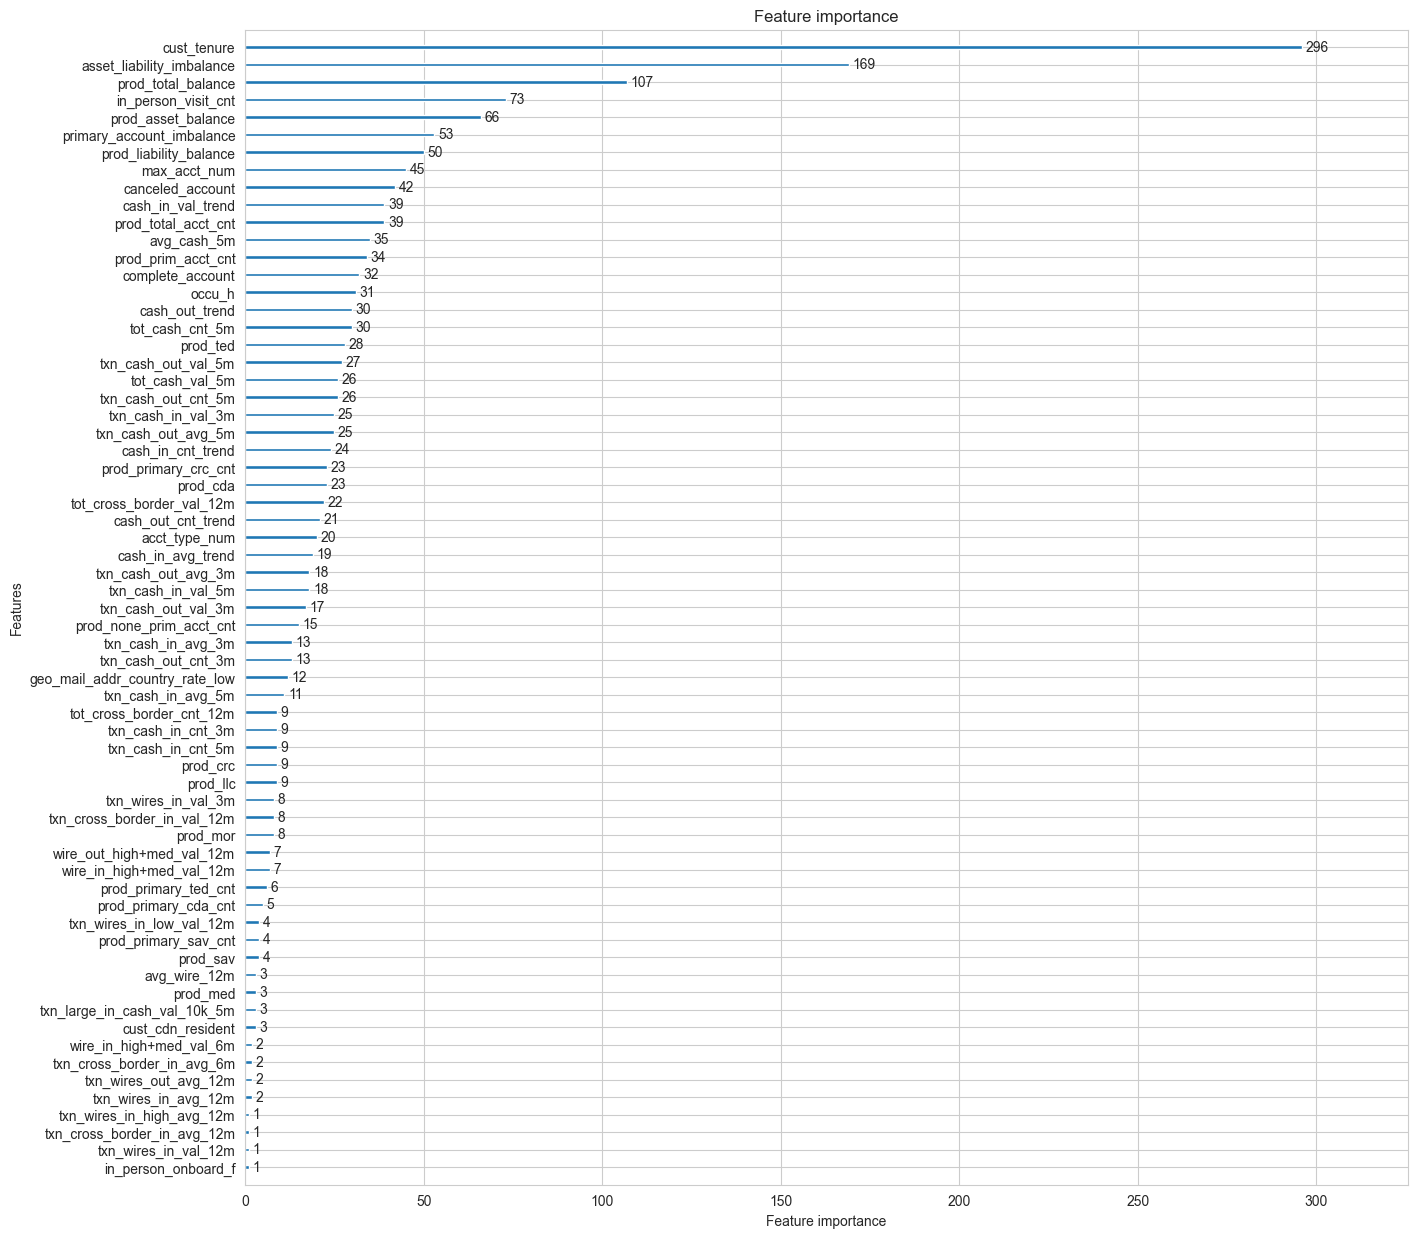

In [67]:
#plot feature importance
import matplotlib.pyplot as plt

lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

In [68]:
# see AUC in test set
from sklearn.metrics import roc_auc_score

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
print('The AUC of prediction is:', roc_auc_score(y_test, y_pred))

The AUC of prediction is: 0.8251602564102565


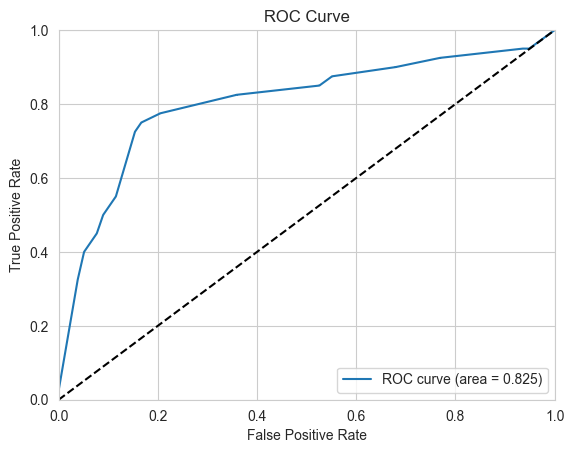

In [69]:
#plot auc plot with 45 degree line
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# apply exponential smoothing to tpr
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tpr = ExponentialSmoothing(tpr).fit().fittedvalues
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# rerun with feature contribution >0.05%

In [70]:
# get the most important features
important_features = pd.DataFrame(gbm.feature_importance(), index=X_train.columns, columns=['importance']).sort_values(
    by='importance', ascending=False)
important_features['importance'] = important_features['importance'] / important_features['importance'].sum()
important_features = important_features[important_features['importance'] >= 0.001].index.tolist()

In [71]:
important_features

['cust_tenure',
 'asset_liability_imbalance',
 'prod_total_balance',
 'in_person_visit_cnt',
 'prod_asset_balance',
 'primary_account_imbalance',
 'prod_liability_balance',
 'max_acct_num',
 'canceled_account',
 'cash_in_val_trend',
 'prod_total_acct_cnt',
 'avg_cash_5m',
 'prod_prim_acct_cnt',
 'complete_account',
 'occu_h',
 'tot_cash_cnt_5m',
 'cash_out_trend',
 'prod_ted',
 'txn_cash_out_val_5m',
 'txn_cash_out_cnt_5m',
 'tot_cash_val_5m',
 'txn_cash_in_val_3m',
 'txn_cash_out_avg_5m',
 'cash_in_cnt_trend',
 'prod_cda',
 'prod_primary_crc_cnt',
 'tot_cross_border_val_12m',
 'cash_out_cnt_trend',
 'acct_type_num',
 'cash_in_avg_trend',
 'txn_cash_out_avg_3m',
 'txn_cash_in_val_5m',
 'txn_cash_out_val_3m',
 'prod_none_prim_acct_cnt',
 'txn_cash_out_cnt_3m',
 'txn_cash_in_avg_3m',
 'geo_mail_addr_country_rate_low',
 'txn_cash_in_avg_5m',
 'txn_cash_in_cnt_5m',
 'tot_cross_border_cnt_12m',
 'txn_cash_in_cnt_3m',
 'prod_crc',
 'prod_llc',
 'txn_cross_border_in_val_12m',
 'prod_mor',
 't

In [72]:
# train lightgbm with important features
lgb_train = lgb.Dataset(X_train[important_features], y_train)
lgb_eval = lgb.Dataset(X_test[important_features], y_test, reference=lgb_train)


In [73]:
# specify your configurations as a dict
params = {
    'verbosity': -1,
    'class_weight': 'balanced',
    'random_state': 42
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

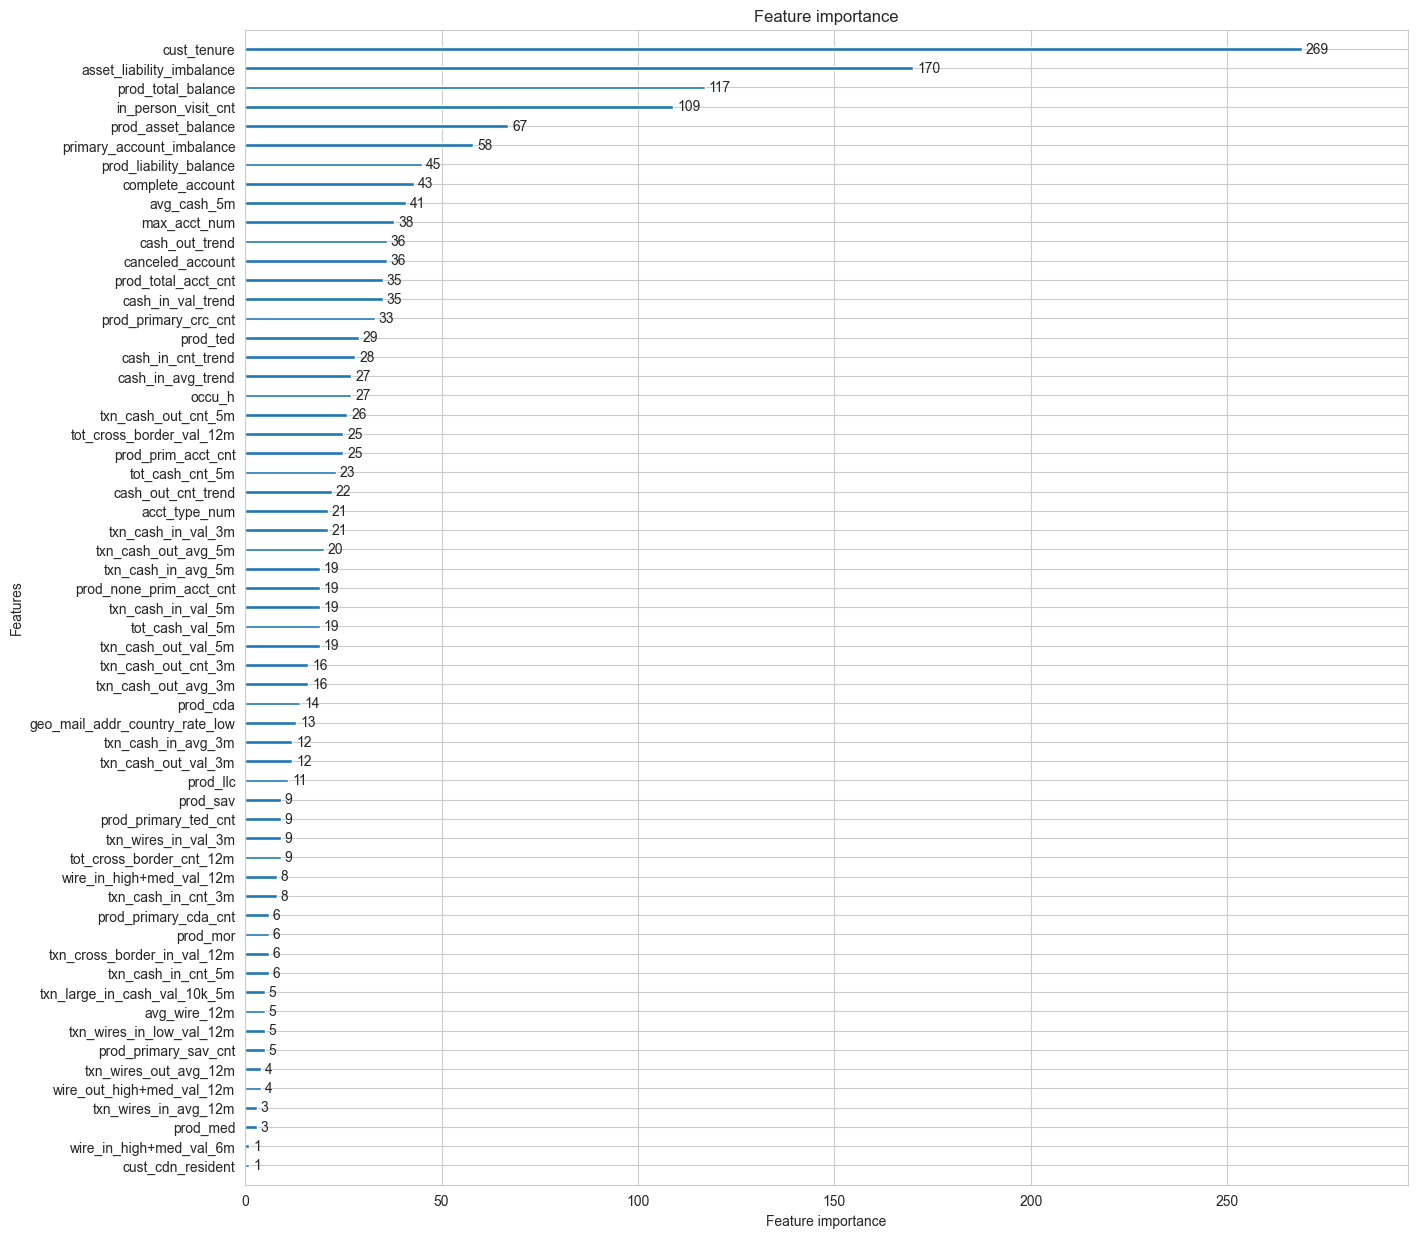

In [74]:
# plot feature importance

lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

In [75]:
# see AUC in test set
from sklearn.metrics import roc_auc_score

y_pred = gbm.predict(X_test[important_features], num_iteration=gbm.best_iteration)
print('The AUC of prediction is:', roc_auc_score(y_test, y_pred))

The AUC of prediction is: 0.8318910256410257


In [76]:
pd.DataFrame(y_pred).value_counts()

-0.056175    2
-0.357424    1
 0.458188    1
 0.549689    1
 0.543623    1
            ..
 0.135820    1
 0.134157    1
 0.129073    1
 0.128703    1
 1.064369    1
Length: 117, dtype: int64

# Q4: model tuning

In [77]:
best_data = data[important_features + ['rating']]

In [78]:
# hyperparameter tuning using optuna
import optuna
from sklearn.metrics import roc_auc_score


def objective(trial):
    # split data into train and test
    X_train, X_test, y_train, y_test = train_test_split(best_data.drop(columns=['rating']), best_data['rating'],
                                                        test_size=0.2, stratify=best_data['rating'], random_state=42)
    # create dataset for lightgbm
    lgb_train = lgb.Dataset(X_train, y_train)
    lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
    # specify your configurations as a dict
    params = {
        'objective': 'binary',
        'metric': 'auc',
        'verbosity': -1,
        'boosting_type': 'gbdt',
        'lambda_l1': trial.suggest_loguniform('lambda_l1', 1e-8, 10.0),
        'lambda_l2': trial.suggest_loguniform('lambda_l2', 1e-8, 10.0),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'feature_fraction': trial.suggest_uniform('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_uniform('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'learning_rate': trial.suggest_loguniform('learning_rate', 1e-8, 1.0),
        'num_iterations': trial.suggest_int('num_iterations', 100, 1000),
        'early_stopping_round': trial.suggest_int('early_stopping_round', 1, 30),
        'class_weight': 'balanced',
        'random_state': 42
    }
    # train lightgbm
    gbm = lgb.train(params,
                    lgb_train,
                    num_boost_round=100,
                    valid_sets=lgb_eval,
                    )
    # see AUC in test set
    y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
    return roc_auc_score(y_test, y_pred)

In [79]:
sampler = optuna.samplers.TPESampler(seed=42) 
study = optuna.create_study(direction='maximize', sampler=sampler)
study.optimize(objective, n_trials=100)

[I 2023-11-23 13:59:24,237] A new study created in memory with name: no-name-b7808641-8496-458b-9967-995eb13a6bb5
[I 2023-11-23 13:59:24,306] Trial 0 finished with value: 0.8668269230769231 and parameters: {'lambda_l1': 2.348881295853308e-05, 'lambda_l2': 3.6010467344475403, 'num_leaves': 188, 'feature_fraction': 0.759195090518222, 'bagging_fraction': 0.4936111842654619, 'bagging_freq': 2, 'min_child_samples': 10, 'learning_rate': 0.08499808989182997, 'num_iterations': 641, 'early_stopping_round': 22}. Best is trial 0 with value: 0.8668269230769231.
[I 2023-11-23 13:59:24,347] Trial 1 finished with value: 0.8328525641025641 and parameters: {'lambda_l1': 1.5320059381854043e-08, 'lambda_l2': 5.360294728728285, 'num_leaves': 214, 'feature_fraction': 0.5274034664069657, 'bagging_fraction': 0.5090949803242604, 'bagging_freq': 2, 'min_child_samples': 34, 'learning_rate': 0.00015777981883364995, 'num_iterations': 489, 'early_stopping_round': 9}. Best is trial 0 with value: 0.8668269230769231.

In [80]:
print('Number of finished trials:', len(study.trials))
print('Best trial:', study.best_trial.params)
print('Best auc:', study.best_value)

Number of finished trials: 100
Best trial: {'lambda_l1': 0.00021560355615771027, 'lambda_l2': 3.964482908508439e-06, 'num_leaves': 219, 'feature_fraction': 0.9237140107176507, 'bagging_fraction': 0.551619751671045, 'bagging_freq': 3, 'min_child_samples': 12, 'learning_rate': 0.07333903570004631, 'num_iterations': 160, 'early_stopping_round': 28}
Best auc: 0.8905448717948719


In [81]:
# get the best model prediction

# split data into train and test
X_train, X_test, y_train, y_test = train_test_split(best_data.drop(columns=['rating']), best_data['rating'],
                                                    test_size=0.2, stratify=best_data['rating'], random_state=42)
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)
# specify your configurations as a dict

params = {
    'objective': 'binary',
    'metric': 'auc',
    'verbosity': -1,
    'boosting_type': 'gbdt',
    'lambda_l1': study.best_trial.params['lambda_l1'],
    'lambda_l2': study.best_trial.params['lambda_l2'],
    'num_leaves': study.best_trial.params['num_leaves'],
    'feature_fraction': study.best_trial.params['feature_fraction'],
    'bagging_fraction': study.best_trial.params['bagging_fraction'],
    'bagging_freq': study.best_trial.params['bagging_freq'],
    'min_child_samples': study.best_trial.params['min_child_samples'],
    'learning_rate': study.best_trial.params['learning_rate'],
    'num_iterations': study.best_trial.params['num_iterations'],
    'early_stopping_round': study.best_trial.params['early_stopping_round'],
    'class_weight': 'balanced',
    'random_state': 42
}
# train lightgbm
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=100,
                valid_sets=lgb_eval,
                )

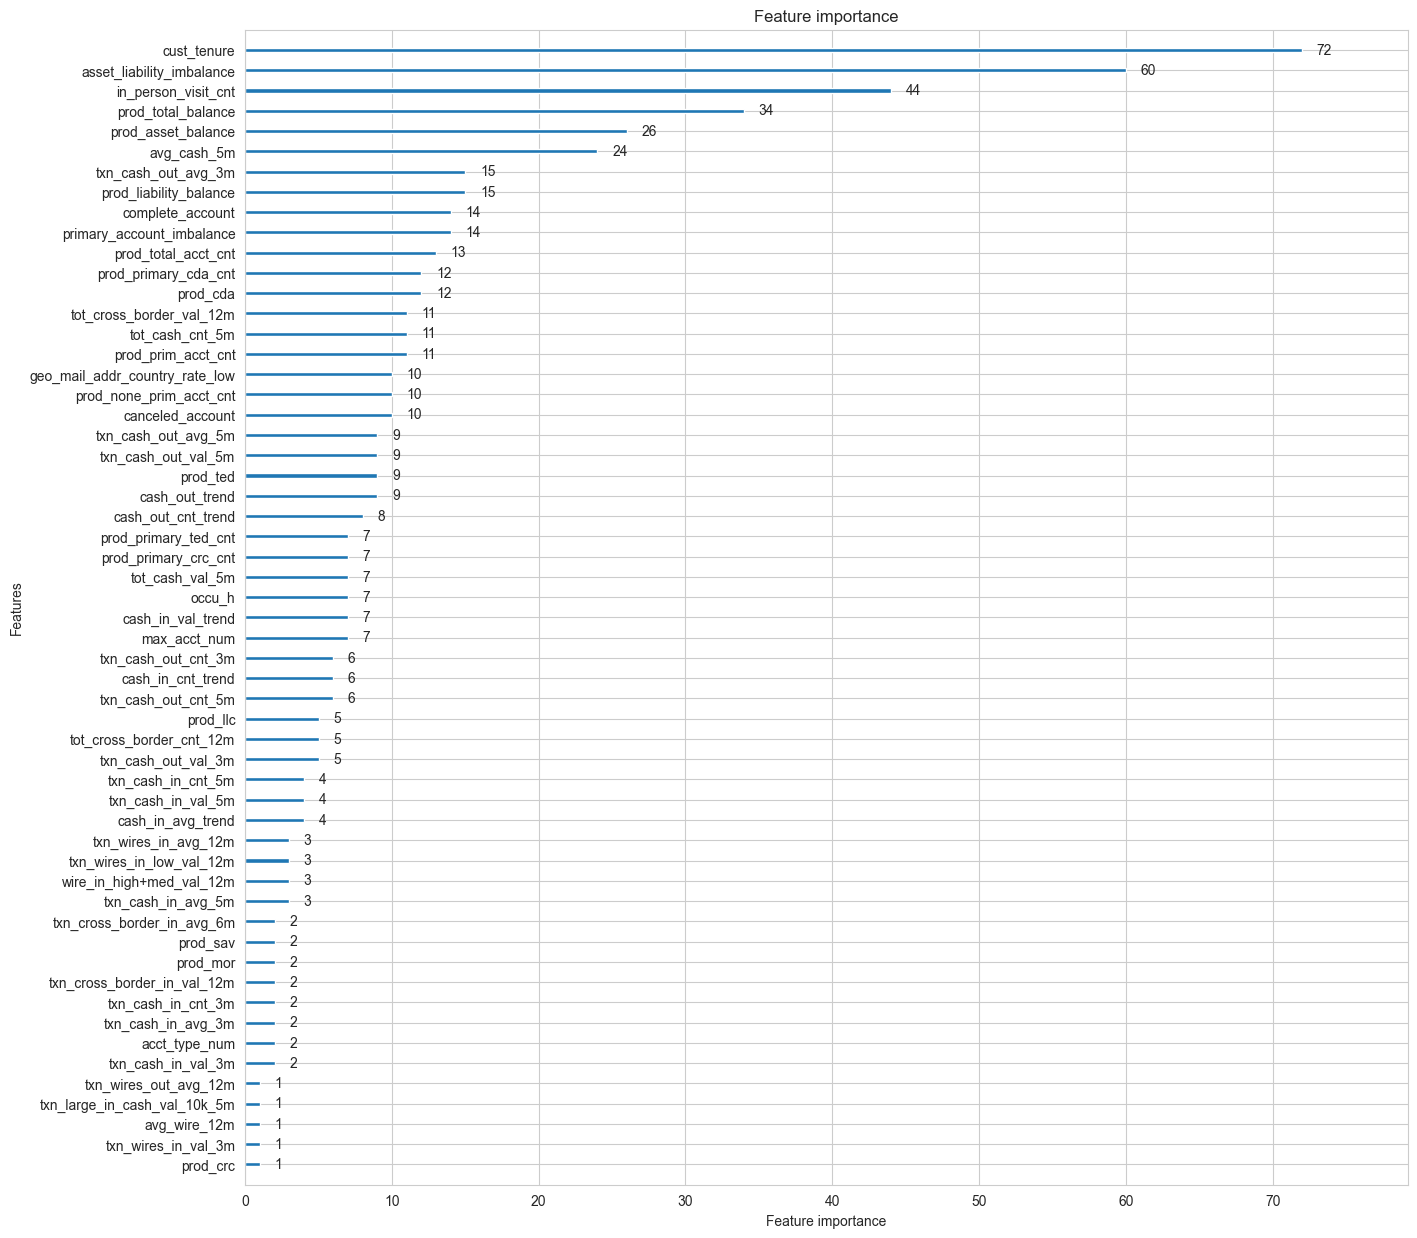

In [82]:
# plot feature importance
lgb.plot_importance(gbm, figsize=(15, 15))
plt.show()

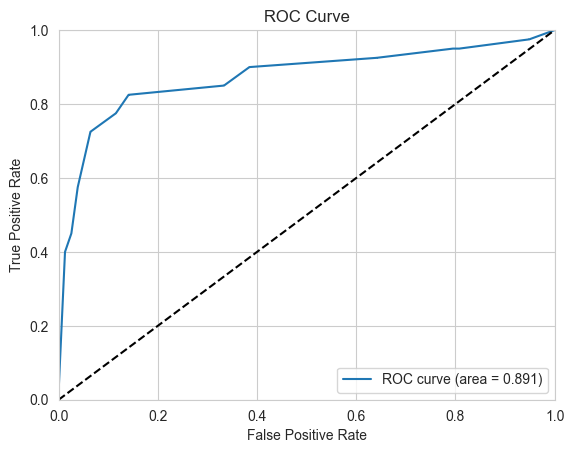

In [83]:
#plot auc plot with 45 degree line
from sklearn.metrics import roc_curve

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
# apply exponential smoothing to tpr
from statsmodels.tsa.holtwinters import ExponentialSmoothing

tpr = ExponentialSmoothing(tpr).fit().fittedvalues
plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc_score(y_test, y_pred))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1])
plt.ylim([0.0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

# Q5: model evaluation

In [84]:
from sklearn.metrics import classification_report

y_pred = gbm.predict(X_test, num_iteration=gbm.best_iteration)
y_pred = np.where(y_pred > 0.5, 1, 0)  # this threashold is adjustable
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.87      0.94      0.90        78
           1       0.85      0.72      0.78        40

    accuracy                           0.86       118
   macro avg       0.86      0.83      0.84       118
weighted avg       0.86      0.86      0.86       118


In [85]:
print(pd.DataFrame(y_pred).value_counts())

0    84
1    34
dtype: int64


# Q6 Nicola: feature correlation with the target on the training set

In [86]:
temp = pd.concat([X_train[important_features], y_train], axis=1).corr()['rating'].sort_values(ascending=False)[1:]

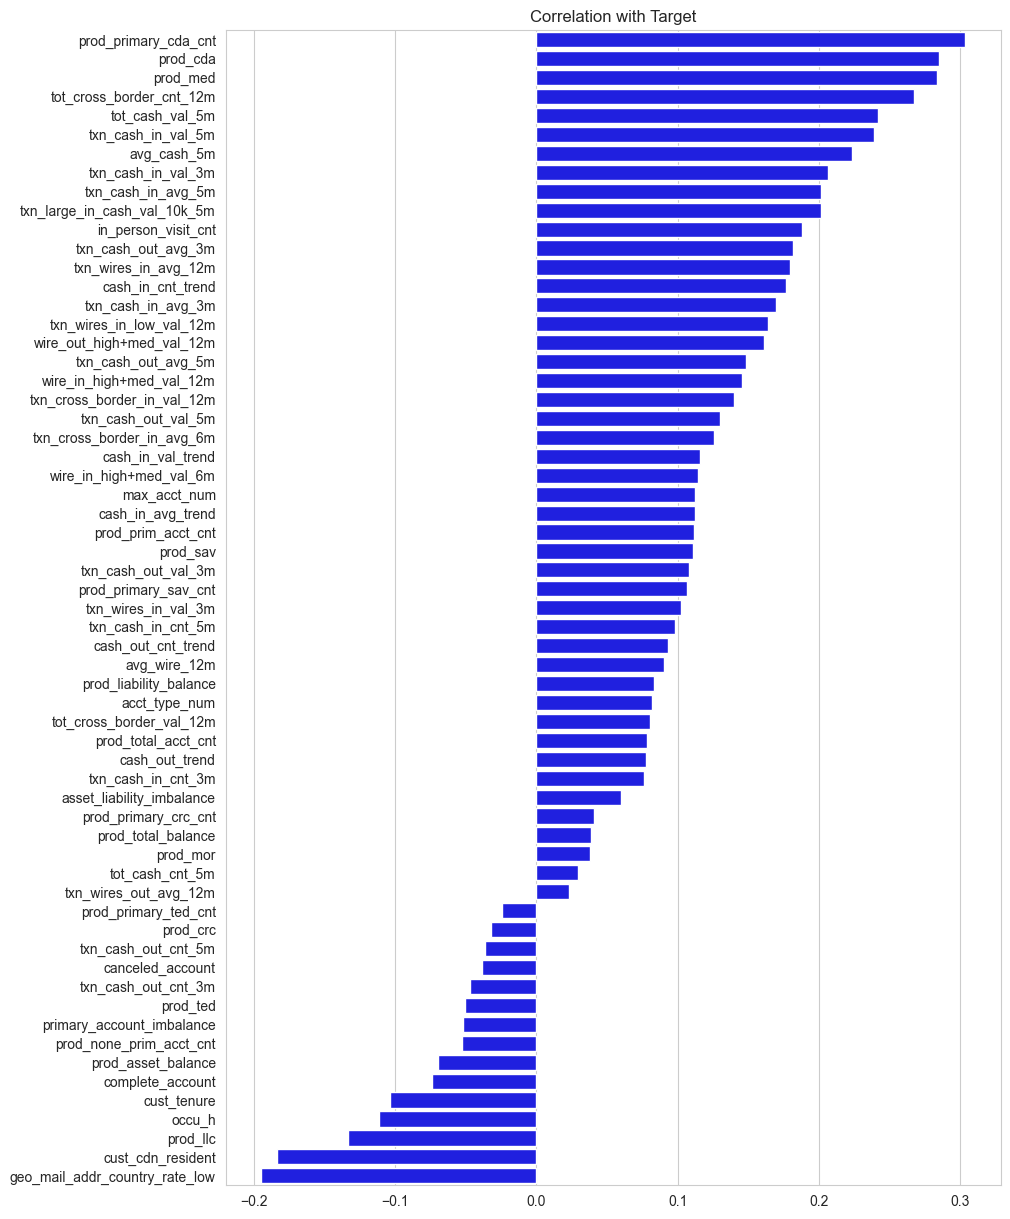

In [87]:
# horizontal bar plot, ordered from the most positive to the most negative correlation
plt.figure(figsize=(10, 15))
sns.barplot(x=temp.values, y=temp.index,color='blue')
plt.title('Correlation with Target')
plt.show()